In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-absstab-regions)

Euler and Backward Euler time-stepping methods were used to solve $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

In [2]:
m = 40
_, _, Dₓₓ = FNC.diffper(m, [0, 1]);

The eigenvalues of this matrix are real and negative:

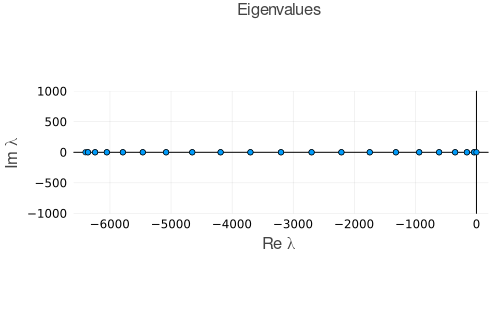

In [3]:
λ = eigvals(Dₓₓ)
scatter(real(λ), imag(λ);
    title="Eigenvalues",
    frame=:zerolines,  aspect_ratio=1,
    xaxis=("Re λ"),  yaxis=("Im λ", (-1000, 1000)))

The Euler method is absolutely stable in the region $|\zeta+1| \le 1$ in the complex plane:

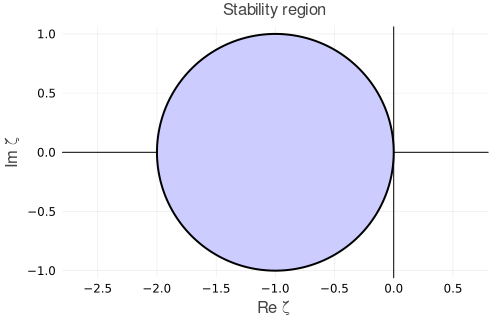

In [4]:
phi = 2π * (0:360) / 360
z = @. cis(phi) - 1;    # unit circle shifted to the left by 1

plot(Shape(real(z), imag(z));
    color=RGB(.8, .8, 1),
    xaxis=("Re ζ"),  yaxis=("Im ζ"),
    aspect_ratio=1,  frame=:zerolines,
    title="Stability region") 

In order to get inside this region, we have to find $\tau$ such that $\lambda \tau > -2$ for all eigenvalues $\lambda$. This is an upper bound on $\tau$.

In [5]:
λ_min = minimum(λ)
@show max_τ = -2 / λ_min;

max_τ = -2 / λ_min = 0.0003125000000000001

Here we plot the resulting values of $\zeta=\lambda \tau$.

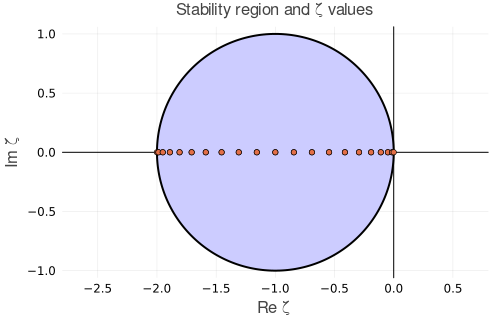

In [6]:
ζ = λ * max_τ
scatter!(real(ζ), imag(ζ), title="Stability region and ζ values")

In backward Euler, the region is $|\zeta-1|\ge 1$. Because they are all on the negative real axis, all of the $\zeta$ values will fit no matter what $\tau$ is chosen.

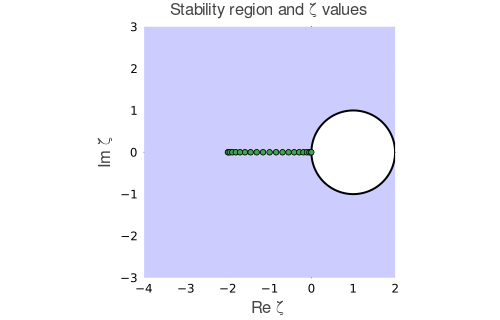

In [7]:
plot(Shape([-6, 6, 6, -6], [-6, -6, 6, 6]), color=RGB(.8, .8, 1))
z = @. cis(phi) + 1;   # unit circle shifted right by 1
plot!(Shape(real(z), imag(z)), color=:white)

scatter!(real(ζ), imag(ζ);
    xaxis=([-4, 2], "Re ζ"),  yaxis=([-3, 3], "Im ζ"),
    aspect_ratio=1,  frame=:zerolines,
    title="Stability region and ζ values")